# Getting to know the dataset 

### First, I read the csv file and drop the row that contains empty cell for Paid column

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("C:/Users/ali/Downloads/data_3.csv")
df.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,132817,Photo,3,8,4,10,0.0,33536,64850,1954,1016,1678,50076,24448,1564,33,1155,102,1290
1,132817,Photo,2,8,4,3,1.0,4204,7191,498,408,596,5161,2974,387,2,139,25,166
2,132817,Photo,1,8,3,9,0.0,3376,6557,428,409,631,5700,2806,331,0,40,5,45
3,132817,Status,2,8,3,2,1.0,9236,16054,1151,1130,1560,14014,7880,1075,2,53,15,70
4,132817,Photo,3,8,2,10,0.0,72864,205934,946,759,1158,122474,30912,646,4,220,19,243
5,132817,Photo,3,8,2,3,0.0,3358,5682,394,323,523,4200,2426,298,2,114,16,132
6,132201,Photo,1,8,1,12,1.0,3254,5644,371,344,513,5069,2846,283,0,39,3,42
7,132201,Photo,1,8,1,3,0.0,50640,121234,2240,1577,2779,92348,34880,1790,4,859,68,931
8,132201,Photo,2,8,7,10,0.0,3734,6218,529,434,794,4831,2868,389,5,137,20,162
9,132201,Photo,3,8,7,3,0.0,2594,4220,347,315,529,3418,2067,248,1,54,11,66


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     301 non-null    int64  
 1   Type                                                                 301 non-null    object 
 2   Category                                                             301 non-null    int64  
 3   Post Month                                                           301 non-null    int64  
 4   Post Weekday                                                         301 non-null    int64  
 5   Post Hour                                                            301 non-null    int64  
 6   Paid                                                                 300 non-null    float64
 7   Lifetime

In [4]:
df.dropna(subset = ["Paid"], inplace=True)

#### After that I convert int type of Paid column to boolean to use it more efficiently later

In [5]:
df['Type'].unique()

array(['Photo', 'Status', 'Video', 'Link'], dtype=object)

In [6]:
df['Paid'] = df['Paid'].astype('bool')

# Visualization of Data

By analyzing total reach and total impressions by publishing hour, we can observe that,
- Both impression and reach are higher between 5am-7am, 12pm-14pm and additionally 10am and 22pm

- at 7 am, total impressions are significantly higher than other parts of the day.( but it can also happen due to one outlier post)


<AxesSubplot:xlabel='Post Hour', ylabel='Lifetime Post Total Impressions'>

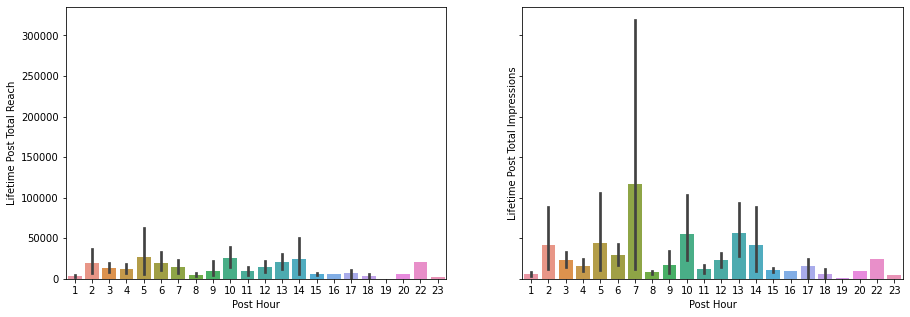

In [353]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], x='Post Hour',y='Lifetime Post Total Reach', data=df,  )
sns.barplot(ax=axes[1], x='Post Hour',y='Lifetime Post Total Impressions', data=df,  )

Next, I use boxplot to visualize total reach along with, this time total interactions.
Noteworthy detail is that:
 - although bottom 25% are almost the same for both columns, upper 25% are significantly more distributed in the case of total reach. And this is not surprising because, especially Paid posts can get more reach but their interaction rate are not ususally so high. Therefore, there are much more outliers for total reach too.

Text(0.5, 0, ' The number of unique users who saw a page post.')

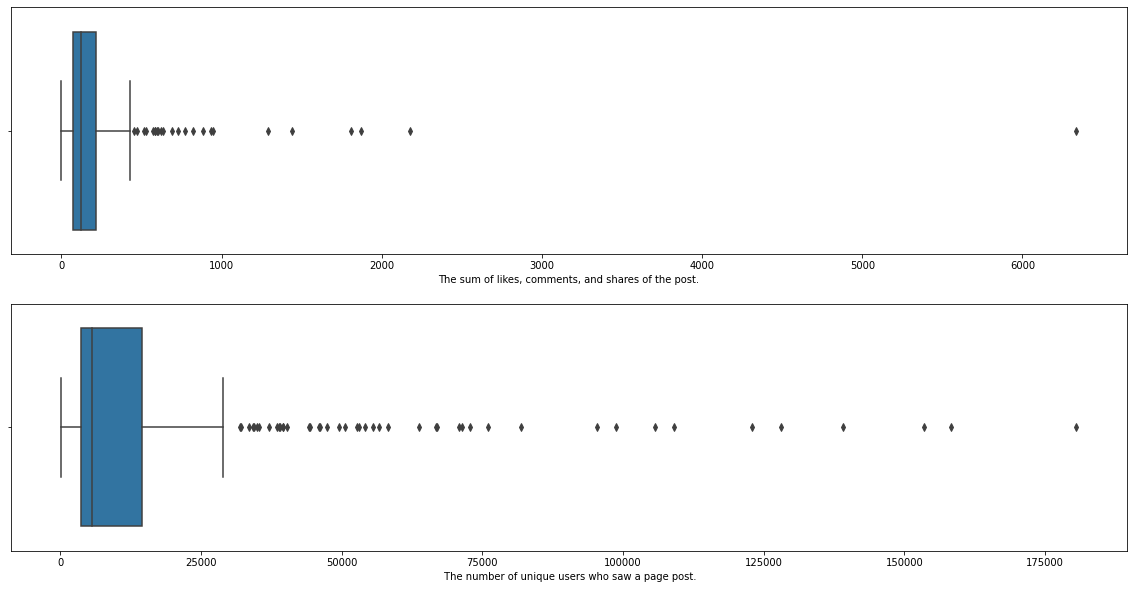

In [349]:
fig, axes = plt.subplots(figsize=(20,10), nrows=2)
sns.boxplot(data=df, x='Total Interactions', ax=axes[0]); axes[0].set_xlabel('The sum of likes, comments, and shares of the post.')
sns.boxplot(data=df, x='Lifetime Post Total Reach', ax=axes[1]); axes[1].set_xlabel(' The number of unique users who saw a page post.')

- Next, analyzing total impressions by content type and also category, we want to see what should we focus on more to increase total impressions in our fb page. It can be observed that Video content generates most impressions even though, most of the posts are Photos.
- Another noteworthy point is that for Videos are only shared in Action category and there is no Status with inspirational content. 

- Moreover, looking at categories by category, it is interesting that in February lots of instipatioanal posts were published.

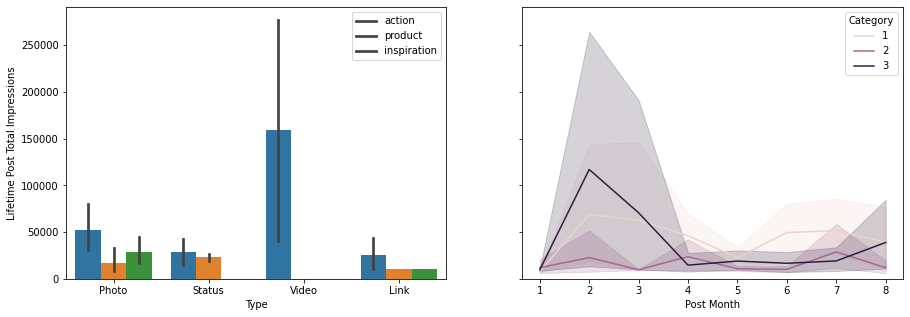

In [371]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
a=sns.barplot(ax=axes[0],x='Type',y='Lifetime Post Total Impressions', data=df ,hue='Category')
a.legend(['action', 'product','inspiration'])
a=sns.lineplot(ax=axes[1],x='Post Month',y='Lifetime Post Total Impressions', data=df ,hue='Category')

Regarding Weekdays in terms of the number of post consumers, Video content published on Wednesday got the most consumers. 

<AxesSubplot:xlabel='Post Weekday', ylabel='Lifetime Post Consumers'>

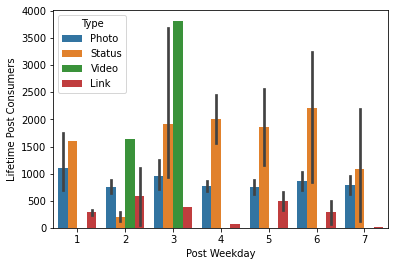

In [370]:
sns.barplot( x='Post Weekday',y='Lifetime Post Consumers', data=df, hue='Type'  )

Statuses published during April got most interactions and Video content published in June and July were most successful

<AxesSubplot:xlabel='Post Month', ylabel='Total Interactions'>

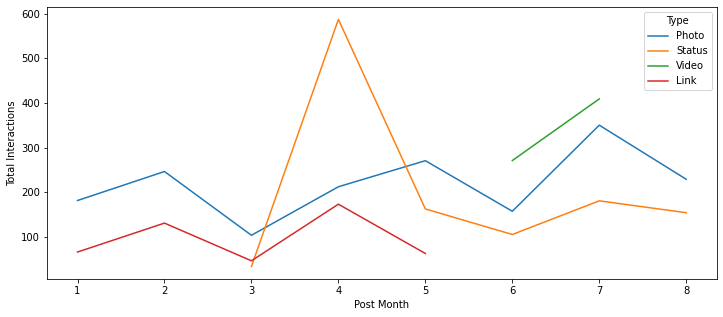

In [374]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Post Month',y='Total Interactions',ci=None, hue='Type')

Most of the posts were Photos and the number of paid photos were 2 times less than free posts. 
However, when we look at total interactions, clearly paid posts resulted in more likes, comments and shares EXCEPT FROM LINKS, where paid link posts generated 2-3 times less interaction than free link posts.
And again Video content were more successful in getting interactions 

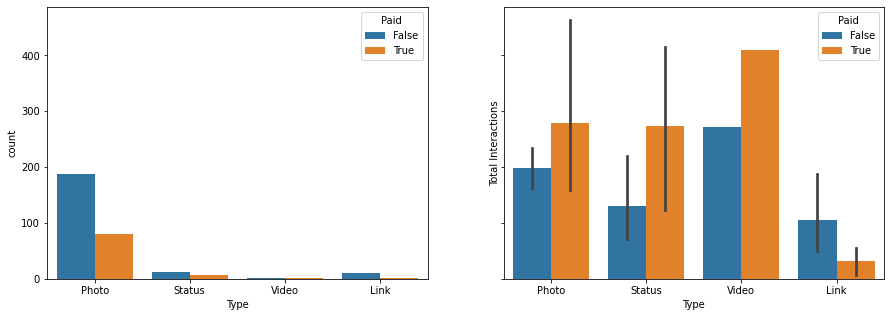

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
a=sns.barplot(ax=axes[1],x='Type',y='Total Interactions', data=df, hue='Paid' )
a=sns.countplot(ax=axes[0],data=df, x='Type',hue='Paid')

<AxesSubplot:xlabel='Post Hour', ylabel='Density'>

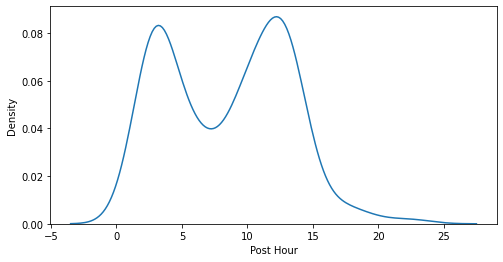

In [11]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['Post Hour'])


using histogram, we can see the difference between engagement with and without liking the page. 

array([[<AxesSubplot:title={'center':'Lifetime People who have liked your Page and engaged with your post'}>,
        <AxesSubplot:title={'center':'Lifetime Engaged Users'}>]],
      dtype=object)

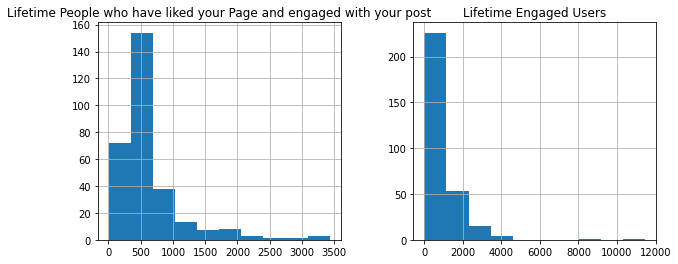

In [12]:
forhist = ['Lifetime People who have liked your Page and engaged with your post', 'Lifetime Engaged Users']
df[forhist].hist(figsize=(10,4))

Analyzing post consuption in categories divided by paid, we see that in action posts distribution of paid posts are more than free posts and in inspiratoinal posts (both free and paid) distribution is so narrow.

<AxesSubplot:xlabel='Category', ylabel='Lifetime Post Consumptions'>

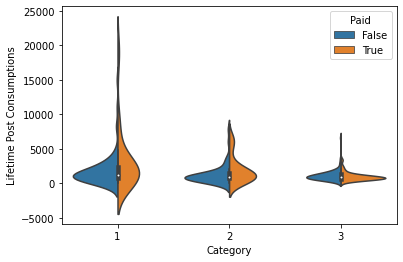

In [357]:
sns.violinplot(data=df,hue='Paid', y='Lifetime Post Consumptions',x='Category',split=True)

Analyzing post reach by people who already liked the page, we see that in both category 1 and 2 posts upper 25 percent have more distribution. the least distribution is observed in 3rd category posts.

<AxesSubplot:xlabel='Category', ylabel='Lifetime Post reach by people who like your Page'>

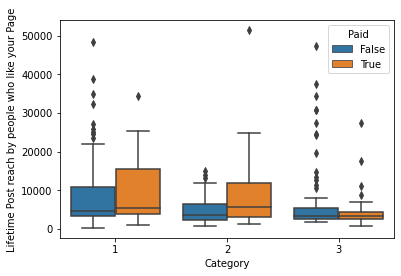

In [14]:
sns.boxplot(data=df,y='Lifetime Post reach by people who like your Page',x='Category', hue='Paid')

Since outliers doesnt allow to see clear analytics i use middle 50 percent to check

<AxesSubplot:xlabel='Post Hour', ylabel='like'>

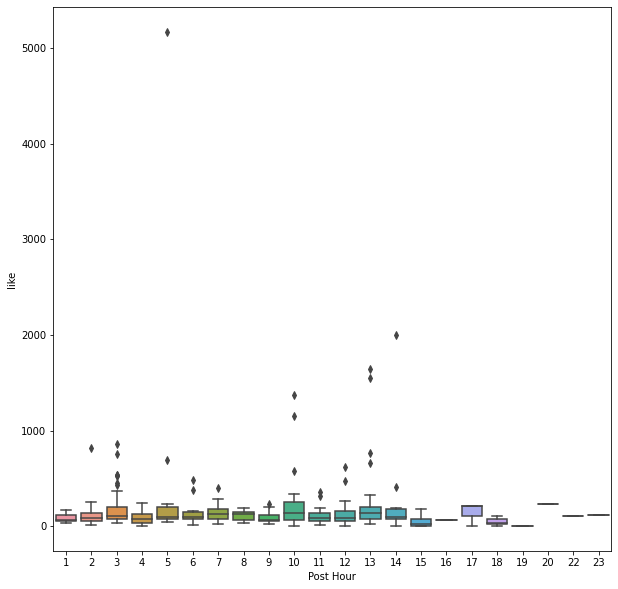

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df,x='Post Hour', y='like',ax=ax)

In [16]:
Q1 = df['like'].quantile(0.25)
Q3 = df['like'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['like'] >= Q1 - 1.5 * IQR) & (df['like'] <= Q3 + 1.5 * IQR)

filtered_df = df.loc[filter]

<AxesSubplot:title={'center':'like'}, xlabel='Post Hour'>

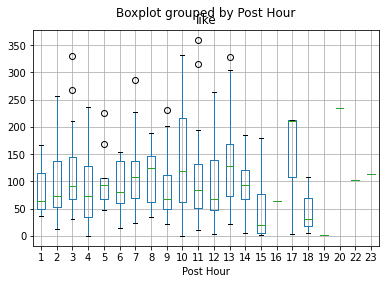

In [17]:
filtered_df.boxplot(column = 'like', by = 'Post Hour')

From the next scatter plot we can see that as total reach increases for category 1 posts, the number of likes does not increase. However, category 3 posts are successful. 

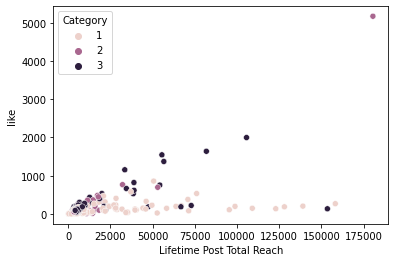

In [18]:
sns.scatterplot(data=df,x='Lifetime Post Total Reach',y='like', hue='Category');

Interesting is relationship between total reach and reach from people who liked since no strong correlation


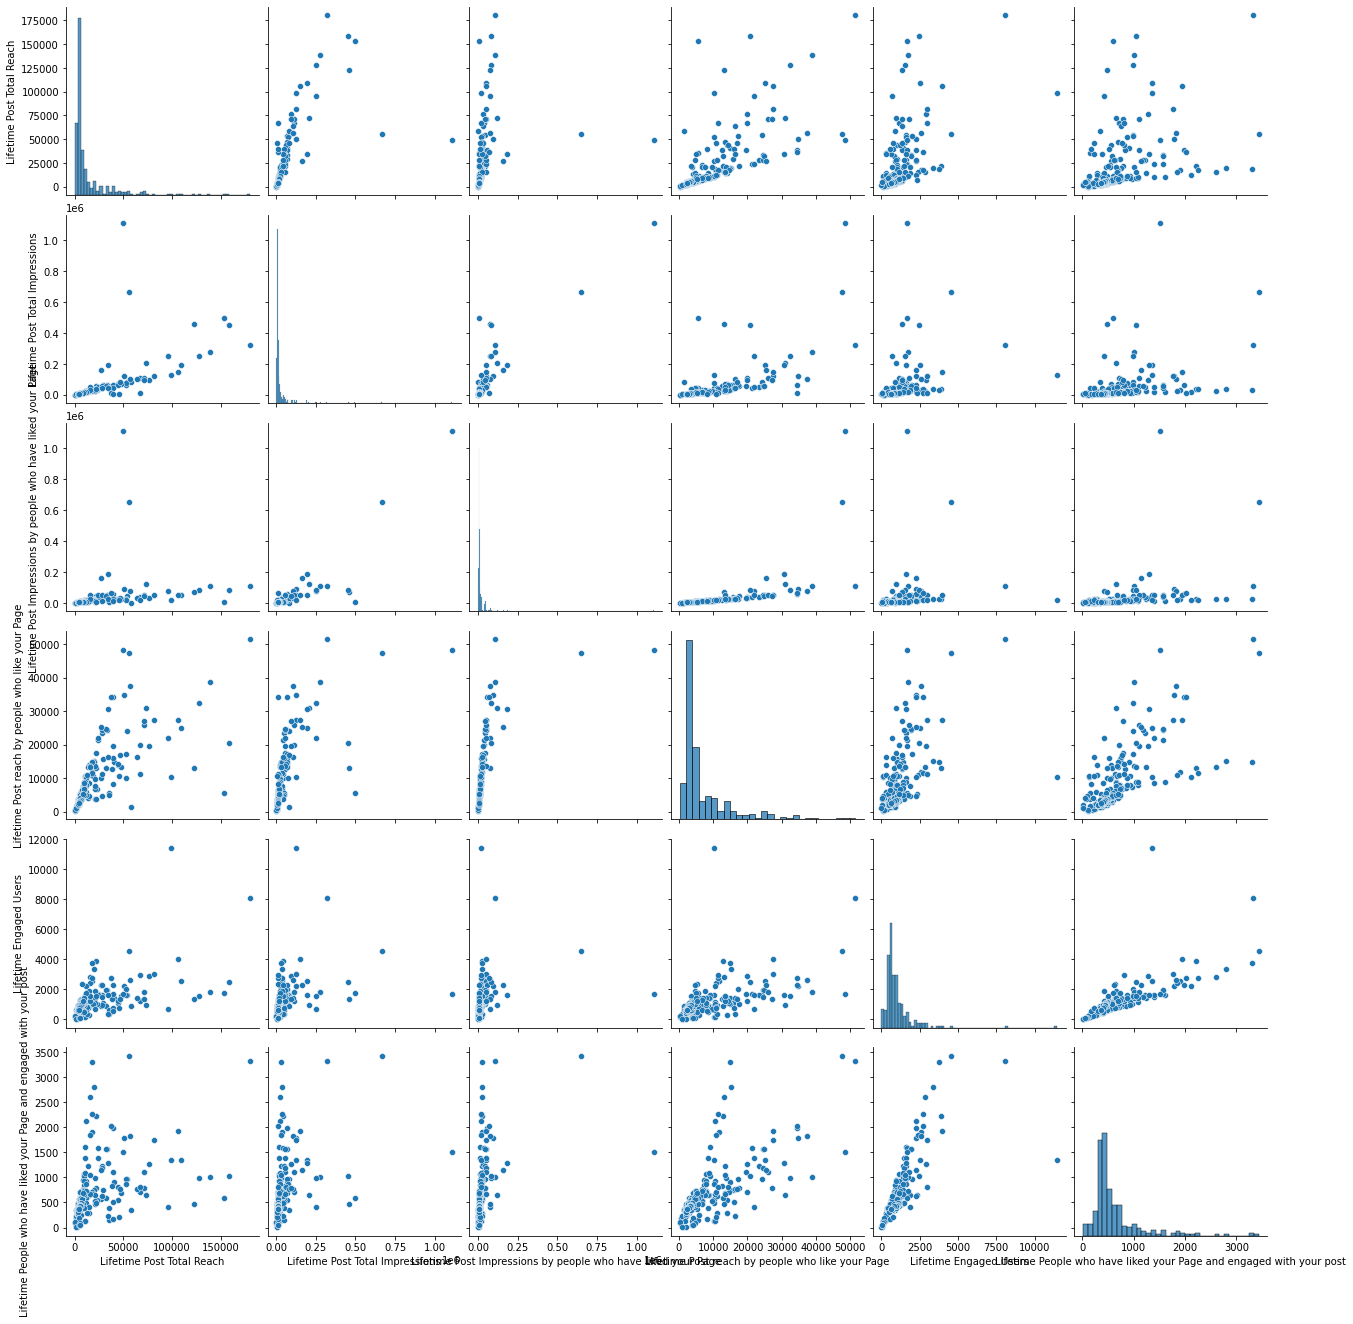

In [346]:
sns.pairplot(data=df[[ 'Lifetime Post Total Reach','Lifetime Post Total Impressions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime Engaged Users','Lifetime People who have liked your Page and engaged with your post']], height=3);

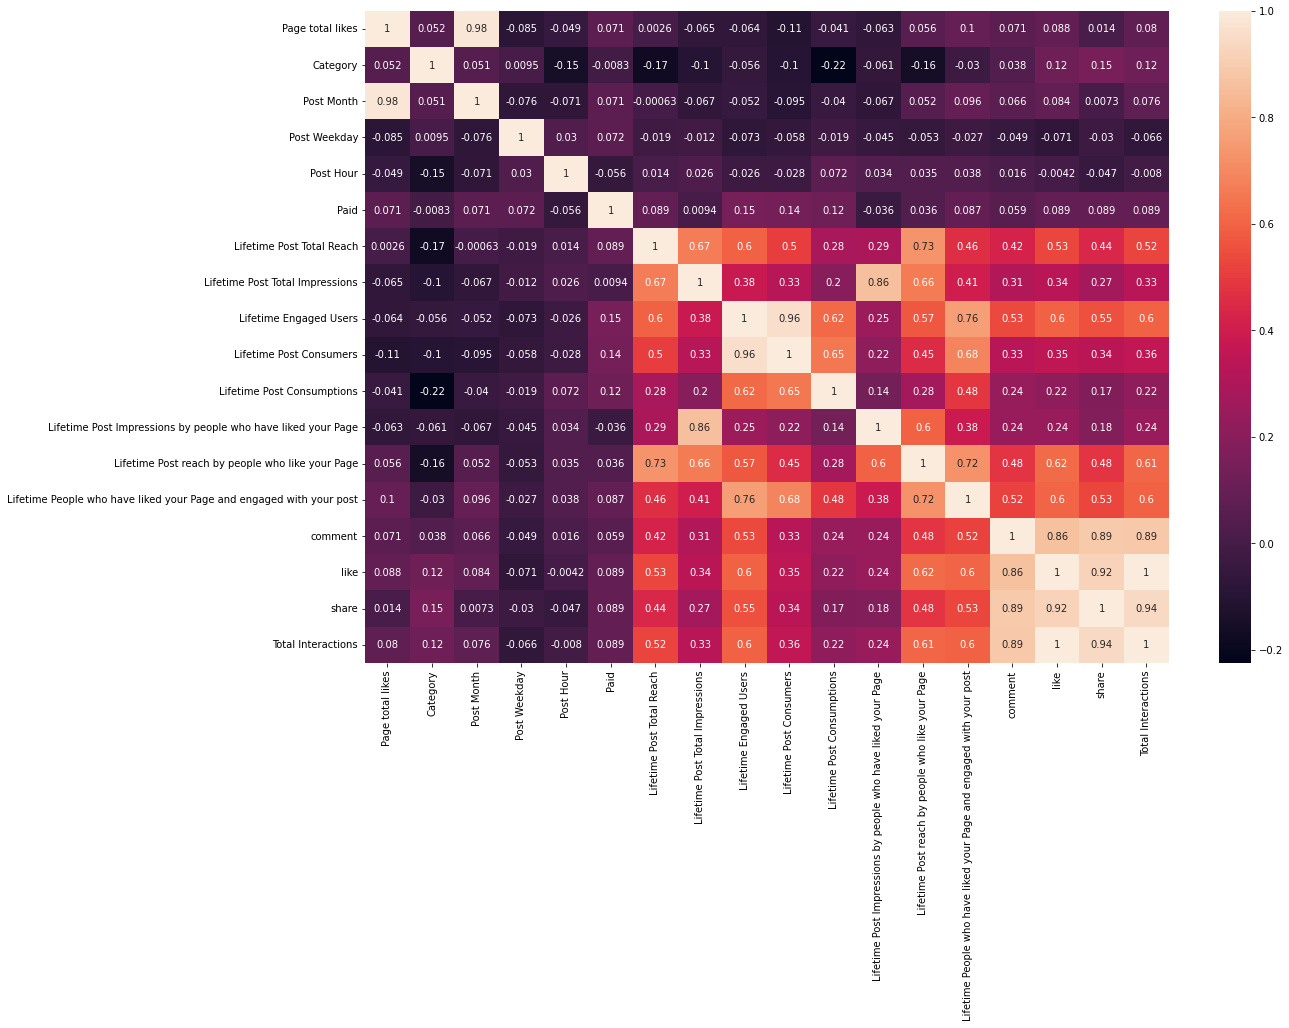

In [20]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, ax=ax);

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Page total likes                                                     300 non-null    int64 
 1   Type                                                                 300 non-null    object
 2   Category                                                             300 non-null    int64 
 3   Post Month                                                           300 non-null    int64 
 4   Post Weekday                                                         300 non-null    int64 
 5   Post Hour                                                            300 non-null    int64 
 6   Paid                                                                 300 non-null    bool  
 7   Lifetime Post Tot

In [78]:
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### In this first regression model, I try to understand how engagement and total reach are associated among people who liked the page. And I try to predict engagement based on reach. I divide the data to train and test datasets and train the model with first and test it with second dataset. With current division accuracy is only 63 percent. But generally, it changed from 60 to 78 percent.

In [79]:
X=df[['Lifetime Post reach by people who like your Page']].to_numpy()

In [80]:
y=df[['Lifetime People who have liked your Page and engaged with your post']].to_numpy()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [82]:
clf=LinearRegression()

In [83]:
clf.fit(X_train,y_train)
clf.intercept_

array([293.98411402])

In [84]:
clf.coef_

array([[0.04268556]])

In [85]:
clf.predict(X_test)

array([[ 386.2703051 ],
       [1024.07801424],
       [ 476.67833134],
       [ 381.23340846],
       [ 502.28967021],
       [ 414.01592222],
       [ 416.15020046],
       [ 431.2608904 ],
       [1760.3186358 ],
       [ 927.77938007],
       [ 408.03994315],
       [ 385.50196494],
       [ 432.96831299],
       [ 729.71835943],
       [ 642.98129177],
       [ 439.28577658],
       [ 477.01981585],
       [ 412.30849963],
       [ 426.22399375],
       [ 382.04443419],
       [ 415.46723142],
       [ 497.3381447 ],
       [ 561.19574963],
       [ 401.03951052],
       [ 321.7724167 ],
       [ 310.20462864],
       [ 523.29096809],
       [1379.22191332],
       [ 464.64100206],
       [ 601.32018053],
       [ 420.93098372],
       [ 426.56547827],
       [ 408.80828331],
       [ 393.44147999],
       [ 474.62942423],
       [ 968.75752227],
       [ 861.53138351],
       [ 411.45478833],
       [1340.29267823],
       [1890.76572181],
       [ 395.91724275],
       [ 655.103

In [86]:
clf.score(X_test,y_test)

0.6300393437601987

C:\Users\ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lifetime Post reach by people who like your Page', ylabel='Lifetime People who have liked your Page and engaged with your post'>

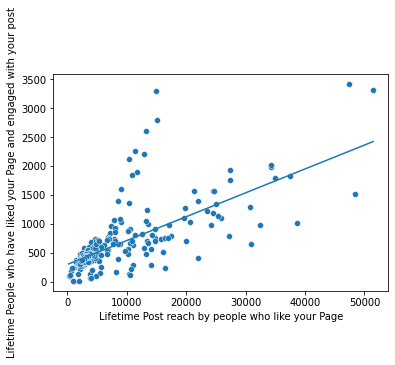

In [31]:
theta0 = clf.intercept_
theta1 = clf.coef_[0]
h = theta0 + theta1 * df['Lifetime Post reach by people who like your Page']
sns.scatterplot(df['Lifetime Post reach by people who like your Page'],df['Lifetime People who have liked your Page and engaged with your post'])
sns.lineplot(df['Lifetime Post reach by people who like your Page'],h)

C:\Users\ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

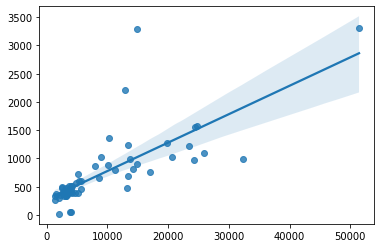

In [32]:
sns.regplot(X_test,y_test)

### In the second model, I did not divide the dataset into subsets, becasue this relationship is obvious. There is a strong relationship between post month and page likes since the number of likes increased over time. It obviosly shows successful smm strategy regarding facebook. And later metrics mean squared error is large due to the fact that dataset consists of 300 rows, without train test division

In [33]:
A=df[['Post Month']]
b=df[['Page total likes']]

In [34]:
clf1=LinearRegression()

In [35]:
clf1.fit(A,b)


LinearRegression()

In [36]:
clf1.intercept_

array([80110.62058835])

In [37]:
clf1.coef_

array([[7122.9901209]])

In [38]:
clf1.predict(A)

array([[137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [137094.54155557],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [129971.55143467],
       [1299

In [39]:
clf1.score(A,b)

0.966182469802042

C:\Users\ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Post Month', ylabel='Page total likes'>

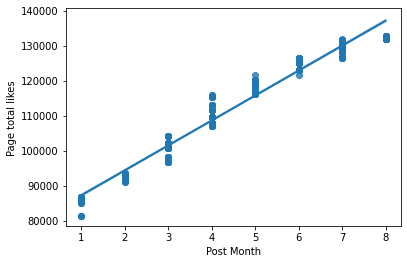

In [40]:
sns.regplot(A,b)

In [41]:
clf1.predict([[9.5]])

C:\Users\ali\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[147779.02673692]])

In [238]:
metrics.mean_squared_error(A, b)

13262049809.626667

### For this regression analysis, i tried to remove very large outliers since it affected the overall dataset a lot. Here I tried to predict the number of people who liked the page and engaged with the post with general engagement and post consumption. 

In [324]:
Q1 = df['Lifetime Engaged Users'].quantile(0.05)
Q3 = df['Lifetime Engaged Users'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['Lifetime Engaged Users'] >= Q1 - 1.5 * IQR) & (df['Lifetime Engaged Users'] <= Q3 + 1.5 * IQR)

filtered_df2 = df.loc[filter]

In [339]:
M=filtered_df2[['Lifetime Engaged Users','Lifetime Post Consumers']].to_numpy()
n=filtered_df2['Lifetime People who have liked your Page and engaged with your post'].to_numpy()

In [340]:
M_train, M_test, n_train, n_test = train_test_split(M, n, train_size=0.90)

In [341]:
clf2=LinearRegression()

In [342]:
clf2.fit(M_train,n_train)

LinearRegression()

In [343]:
clf2.coef_

array([ 1.09266614, -0.5839353 ])

In [344]:
clf2.score(M_test,n_test)

0.7830367277756046

C:\Users\ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lifetime Engaged Users', ylabel='Lifetime People who have liked your Page and engaged with your post'>

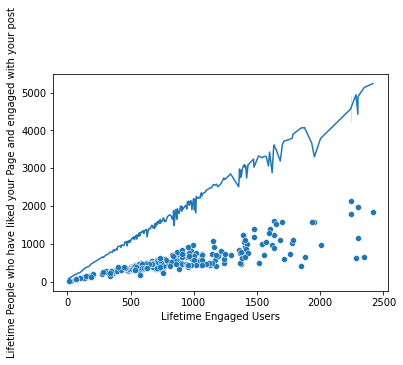

In [345]:
theta0 = clf2.intercept_
theta1 = clf2.coef_[0]
theta2 = clf2.coef_[[0]]
h = theta0 + theta1 * filtered_df2['Lifetime Engaged Users'] + theta2 * filtered_df2['Lifetime Post Consumers']

sns.scatterplot(filtered_df2['Lifetime Engaged Users'], filtered_df2['Lifetime People who have liked your Page and engaged with your post'])
sns.lineplot(filtered_df2['Lifetime Engaged Users'],h)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Page total likes                                                     300 non-null    int64 
 1   Type                                                                 300 non-null    object
 2   Category                                                             300 non-null    int64 
 3   Post Month                                                           300 non-null    int64 
 4   Post Weekday                                                         300 non-null    int64 
 5   Post Hour                                                            300 non-null    int64 
 6   Paid                                                                 300 non-null    bool  
 7   Lifetime Post Tot

# Logistic regression

In [222]:
import sklearn.metrics as metrics
import seaborn as sns

### In the first classification analysis, I tried to predict Category with the use of total reach and total interactions.

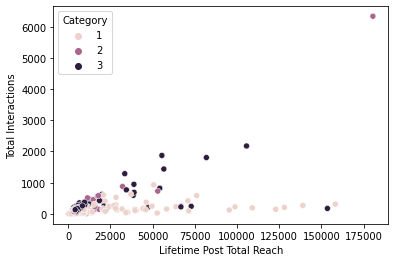

In [209]:
sns.scatterplot(data=df,y='Total Interactions', x='Lifetime Post Total Reach',hue='Category');

In [182]:
Q=df[['Total Interactions','Lifetime Post Total Reach']].to_numpy()
k=df['Category'].to_numpy()

In [192]:
Q_train, Q_test, k_train, k_test = train_test_split(Q, k, train_size=0.80)

In [193]:
clf5=LogisticRegression()

In [196]:
clf5.fit(Q_train,k_train)

LogisticRegression()

In [198]:
clf5.score(Q_test,k_test)

0.6333333333333333

In [208]:
clf5.predict([[2000,75000]])

array([3], dtype=int64)

## In the second classification, I tried to predict again Category, but this time using total interactions along with another categocial feature- Post type. First, I create a copy of type column where I replace strings with integeres to be able to use it in the analysis. 

### As can be seen from the prediction, if total interactions are only 100 and type is 4(Link) it probably belongs to 1st category- action. 

### The reason why general accuracy is 50 percent is because, for Photo type we can observe all types of categories specially if the number of total interactions are within 0- 1000 range. 

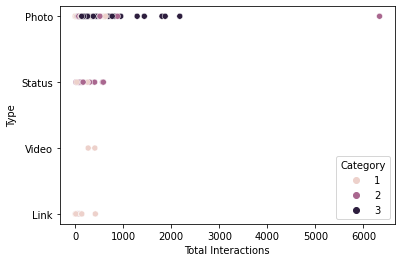

In [239]:
sns.scatterplot(data=df,y='Type', x='Total Interactions',hue='Category');

In [261]:
typecopy=df['Type'].copy()
df['copytype']=typecopy
df['copytype'].replace(['Photo','Status','Video','Link'],[1,2,3,4], inplace=True)
df['copytype']

0      1
1      1
2      1
3      2
4      1
      ..
295    1
296    1
297    1
298    1
299    1
Name: copytype, Length: 300, dtype: int64

In [262]:
Z=df[['Total Interactions','copytype']].to_numpy()
s=df['Category'].to_numpy()

In [263]:
clf6=LogisticRegression()

In [265]:
clf6.fit(Z,s)

LogisticRegression()

In [266]:
clf6.score(Z,s)

0.49333333333333335

In [267]:
clf6.predict([[100,4]])

array([1], dtype=int64)

This visualization can be used to analyze general success rate of facebook page of cosmetics brand from different perspectives, including interactions, engagement and so on. 